# The comparative method

As per normal, before you begin, please make your own copy of this notebook to work on, by selecting 'duplicate notebook' from the command palette. 

In this exercise, we'll walk through the steps of doing a basic comparative phylogenetic analysis. Specifically, we'll use Phylogenetically Independent Contrasts to test if birds infected by blood parasites such as *Plasmodium* spp. (which cause Avian Malaria) are more vulverable to predation. If so that would affect parasite-host dynamics, since predation would reduce parasite transmission success.  

We'll use data from [Moller and Nielsen 2007](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/06-0747). And a time-scaled phylogeny from [TimeTree](http://www.timetree.org/).

We'll start by loading an R library called ape, which makes it easy to work with phylogenies. Then we'll load our tree, and comparative data.

In [1]:
library(ape)
##As per normal, we'll load that data as a big ugly chunk of text
d <- read.csv(text='Species,Prey_vulnerability_index,Body_mass,Population_density,Prevalence_of_blood_parasites,N
Accipiter_gentilis,0.47,1140,0.023,0.5,22
Accipiter_nisus,-0.07,204,0.127,0.67,24
Alauda_arvensis,-1.07,36.4,2.8,0.09,32
Anas_crecca,1.79,286,0.0005,0.22,9
Anas_platyrhynchos,0.18,1119,0.08,0.01,76
Anser_anser,-0.69,3464,0.0066,0,201
Anthus_trivialis,-1.47,23.4,0.12,0.17,71
Ardea_cinerea,-1.25,1433,0.0118,0.33,3
Asio_flammeus,0.61,295,0.0001,0.41,17
Asio_otus,2.28,256,0.0007,0.46,24
Athene_noctua,1.78,168,0.0001,0.51,297
Aythya_fuligula,0.1,656,0.0016,0,1
Buteo_buteo,-0.97,806,0.17,0.08,79
Carduelis_cannabina,-1.83,18.9,0.18,0.09,131
Carduelis_carduelis,-1,15.6,0.02,0.17,276
Carduelis_chloris,-1.13,27.6,0.2,0.44,191
Certhia_familiaris,-0.17,9.15,0.001,0.1,29
Charadrius_hiaticula,-0.72,63.2,0.0035,0,5
Coccothraustes_coccothraustes,0.72,54.7,0.007,0.55,51
Columba_livia,1.07,261,0.2,0.48,261
Columba_oenas,0.84,314,0.8,0.9,10
Columba_palumbus,0.45,494,0.9,0.53,439
Corvus_corax,-0.65,1201,0.003,0.85,20
Corvus_corone,-0.31,544,0.95,0.38,86
Corvus_frugilegus,-0.56,454,0.1,0.14,901
Corvus_monedula,-0.65,249,0.2,0.03,244
Cuculus_canorus,-0.83,120,0.05,0,2
Dendrocopos_major,0.48,89.7,0.04,0,4
Emberiza_citrinella,-1.35,26.8,0.85,0.66,396
Emberiza_schoeniclus,-1.77,18.8,0.04,0.1,160
Erithacus_rubecula,-1.11,16.4,0.07,0.14,466
Falco_tinnunculus,0.24,174,0.025,0.51,346
Fringilla_coelebs,-0.91,24.2,0.9,0.41,402
Fulica_atra,-0.13,732,0.035,0,1
Gallinago_gallinago,0.43,106,0.0048,0.12,8
Garrulus_glandarius,1.53,162,0.05,0.92,77
Hirundo_rustica,-2.37,19.1,1.1,0.08,818
Lanius_collurio,0.3,30.7,0.001,0.61,61
Larus_argentatus,-0.9,895,0.155,0,4
Larus_canus,0.07,386,0.076,0,2
Larus_ridibundus,0.24,280,0.412,0.05,22
Loxia_curvirostra,0.73,40.6,0.001,1,2
Lullula_arborea,-0.17,30.1,0.001,0.25,4
Miliaria_calandra,-1.5,47.7,0.55,0.2,10
Milvus_milvus,-0.17,1016,0.0001,0.2,5
Motacilla_alba,-1.34,20.8,0.22,0.52,46
Muscicapa_striata,-1.02,15.5,0.007,0.46,74
Numenius_arquata,0.13,725,0.0005,0,1
Oenanthe_oenanthe,-0.91,24,0.011,0.11,53
Parus_caeruleus,-2.21,11.8,0.11,0.39,908
Parus_major,-1.37,18.5,0.38,0.56,1539
Passer_domesticus,-2.13,30.4,0.45,0.4,1261
Passer_montanus,-1.98,21.7,0.32,0.27,310
Perdix_perdix,1.53,382,0.015,0.99,286
Pica_pica,0.63,228,0.28,0.5,42
Picus_viridis,1.91,194,0.0004,0.17,6
Prunella_modularis,-1.3,19,0.04,0.08,312
Pyrrhula_pyrrhula,-0.41,31,0.024,0.08,159
Rallus_aquaticus,-0.66,116,0.0061,0.25,4
Riparia_riparia,-2.13,13.1,0.09,0.02,381
Scolopax_rusticola,1.42,310,0.003,0.3,10
Sitta_europaea,0.67,23.9,0.001,0.4,10
Somateria_mollissima,-1.46,2066,0.039,0,4
Streptopelia_decaocto,0.45,202,0.12,0,2
Strix_aluco,1.21,491,0.0018,0.41,41
Sturnus_vulgaris,0.04,80.5,0.5,0,194
Sylvia_borin,-2.13,19,0.09,0.25,79
Sylvia_communis,-2.17,14.5,0.4,0.19,97
Tadorna_tadorna,-0.82,1152,0.0044,0,2
Tringa_hypoleucos,-0.17,47.8,0.0001,0.21,19
Turdus_merula,0.33,95.8,0.7,0.3,825
Turdus_philomelos,0.79,70.5,0.09,0.43,243
Turdus_pilaris,2.14,92.1,0.001,0.54,71
Turdus_viscivorus,0.78,118,0.055,0.22,27
Tyto_alba,1.13,332,0.0001,0.06,18
Vanellus_vanellus,0.43,218,0.07,0.09,22')
#this just deletes any species with missing data
d <- na.omit(d)
tree <- read.tree(text="((Perdix_perdix:79.95541635,(Anser_anser:30.32876644,((Somateria_mollissima:19.79946580,(Aythya_fuligula:15.46003613,(Anas_crecca:9.40000000,Anas_platyrhynchos:9.40000000)'14':6.06003612)'13':4.33942967)'11':2.95088145,Tadorna_tadorna:22.75034725)'10':7.57841919)'19':49.62664992)'9':18.08745294,(Cuculus_canorus:85.20000000,((((Picus_viridis:24.30000000,Dendrocopos_major:24.30000000)'22':57.30000000,((Athene_noctua:58.24783500,((Asio_otus:10.97427500,Asio_flammeus:10.97427500)'8':37.05750000,Strix_aluco:48.03177500)'6':10.21606000)'30':10.44541867,Tyto_alba:68.69325367)'29':12.90674633)'27':0.85491770,((Sitta_europaea:35.40000000,Certhia_familiaris:35.40000000)'35':15.14237727,((((Hirundo_rustica:27.33644000,Riparia_riparia:27.33644000)'43':16.36356000,((((((Turdus_viscivorus:10.90000000,((Turdus_pilaris:7.62156567,Turdus_merula:7.62156567)'42':3.27843433,Turdus_philomelos:10.90000000)'40':0.00000000)'48':18.11228375,Erithacus_rubecula:29.01228375)'51':5.18771625,Oenanthe_oenanthe:34.20000000)'47':1.24880857,Sturnus_vulgaris:35.44880857)'39':7.28981874,(Sylvia_borin:15.78646000,Sylvia_communis:15.78646000)'56':26.95216731)'55':0.03966873,(Parus_major:13.40000000,Cyanistes_caeruleus:13.40000000)'61':29.37829604)'60':0.92170396)'54':0.00000000,(((Prunella_modularis:31.26910571,(Passer_montanus:10.17768000,Passer_domesticus:10.17768000)'38':21.09142571)'34':3.53089429,((Motacilla_alba:19.10392600,Anthus_trivialis:19.10392600)'26':15.69607400,(((Coccothraustes_coccothraustes:17.90000000,((Loxia_curvirostra:10.50000000,(Carduelis_chloris:10.30000000,(Carduelis_cannabina:8.26749000,Carduelis_carduelis:8.26749000)'66':2.03251000)'75':0.20000000)'80':7.40000000,Pyrrhula_pyrrhula:17.90000000)'78':0.00000000)'74':4.48030514,Fringilla_coelebs:22.38030514)'83':1.89656819,(Emberiza_citrinella:16.30000000,Emberiza_schoeniclus:16.30000000)'73':7.97687333)'88':10.52312667)'86':0.00000000)'72':3.20000000,(Alauda_arvensis:19.80262500,Lullula_arborea:19.80262500)'93':18.19737500)'92':5.70000000)'91':0.30000000,(((Pica_pica:18.36546250,((Corvus_corone:8.82637133,(Corvus_frugilegus:6.15321333,Corvus_corax:6.15321333)'71':2.67315800)'69':5.64707867,Corvus_monedula:14.47345000)'65':3.89201250)'25':4.66026250,Garrulus_glandarius:23.02572500)'5':17.17427500,Lanius_collurio:40.20000000)'102':3.80000000)'100':6.54237727)'107':31.91254043)'111':0.65432695,(((Columba_palumbus:17.90000000,(Columba_oenas:11.02921500,Columba_livia:11.02921500)'110':6.87078500)'106':5.00056860,Streptopelia_decaocto:22.90056860)'129':59.19943140,((((Fulica_atra:46.40000000,Rallus_aquaticus:46.40000000)'128':34.90000000,Ardea_cinerea:81.30000000)'133':0.00000000,((((Larus_argentatus:1.20890915,Larus_canus:1.20890915)'127':4.72109085,Chroicocephalus_ridibundus:5.93000000)'136':60.10473177,(Numenius_arquata:51.14636667,(Actitis_hypoleucos:44.83122800,(Scolopax_rusticola:29.99736000,Gallinago_gallinago:29.99736000)'126':14.83386800)'142':6.31513867)'146':14.88836510)'150':1.80620966,(Vanellus_vanellus:38.30000000,Charadrius_hiaticula:38.30000000)'149':29.54094143)'145':13.45905857)'141':0.00000000,(Falco_tinnunculus:78.27145086,((Buteo_buteo:23.70000000,(Accipiter_gentilis:12.75751000,Accipiter_nisus:12.75751000)'140':10.94249000)'139':7.78295600,Milvus_milvus:31.48295600)'125':46.78849486)'124':3.02854914)'160':0.80000000)'159':1.00924465)'158':2.09075535)'157':12.84286929);
")

Let's have a look.

Species,Prey_vulnerability_index,Body_mass,Population_density,Prevalence_of_blood_parasites,N
Accipiter_gentilis,0.47,1140.0,0.0230,0.50,22
Accipiter_nisus,-0.07,204.0,0.1270,0.67,24
Alauda_arvensis,-1.07,36.4,2.8000,0.09,32
Anas_crecca,1.79,286.0,0.0005,0.22,9
Anas_platyrhynchos,0.18,1119.0,0.0800,0.01,76
Anser_anser,-0.69,3464.0,0.0066,0.00,201


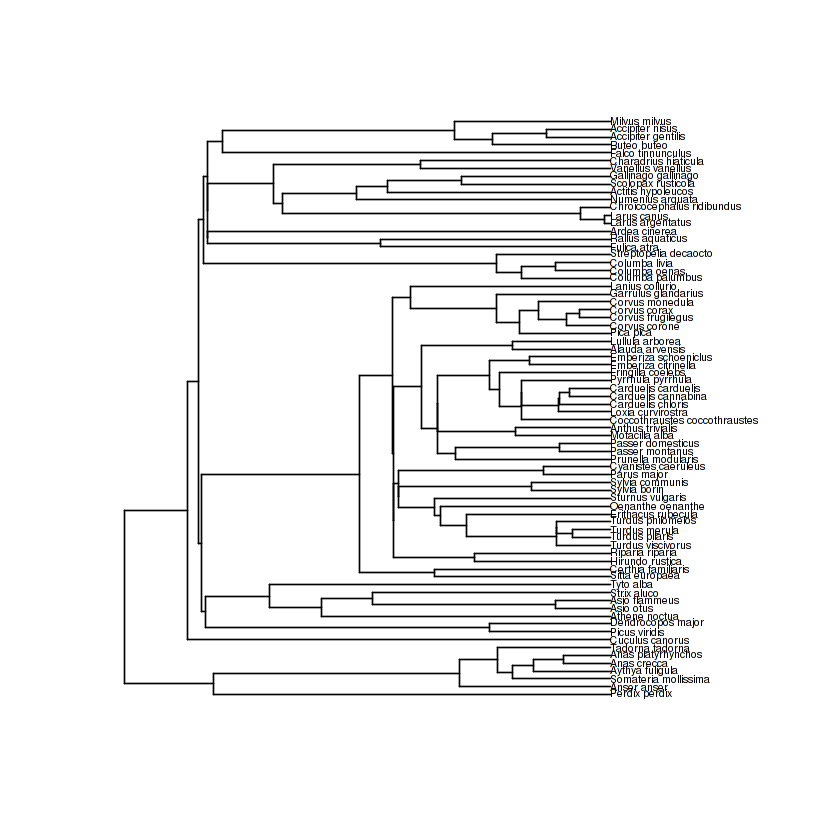

In [2]:
head(d) #this just prints the first few rows of the data frame
plot(tree, cex=0.5)

Our comparative data and phylogeny come from two different sources and don't perfectly overlap. To fix that we'll use a function from the R package geiger. Also you may have notices that features in the comparative data are on very different scales. That can creat problems in any linear regression analysis. The fix is to re-scale all of the features. We'll do that by centering on the mean value, and then expressing each feature value as its distance in standard deviations from that mean. The statistical short hard for this proceedure is standardizing the data. We can do it with the scale() function which is build into R.

Oh. One more thing. To match the comparative data up with the phylogeny, we need to have the row names of the data frame match the tip names of the tree.

,Prey_vulnerability_index,Body_mass,Population_density,Prevalence_of_blood_parasites,N
Accipiter_gentilis,0.6132251,1.50284988,-0.4430540,0.8240921,-0.52192028
Accipiter_nisus,0.1452675,-0.23129628,-0.1845770,1.4717362,-0.51511885
Alauda_arvensis,-0.7213206,-0.54181219,6.4587808,-0.7378732,-0.48791313
Anas_crecca,1.7571214,-0.07937322,-0.4989746,-0.2426159,-0.56612957
Anas_platyrhynchos,0.3619146,1.46394275,-0.3013887,-1.0426469,-0.33828166
Anser_anser,-0.3920171,5.80857175,-0.4838139,-1.0807436,0.08680773


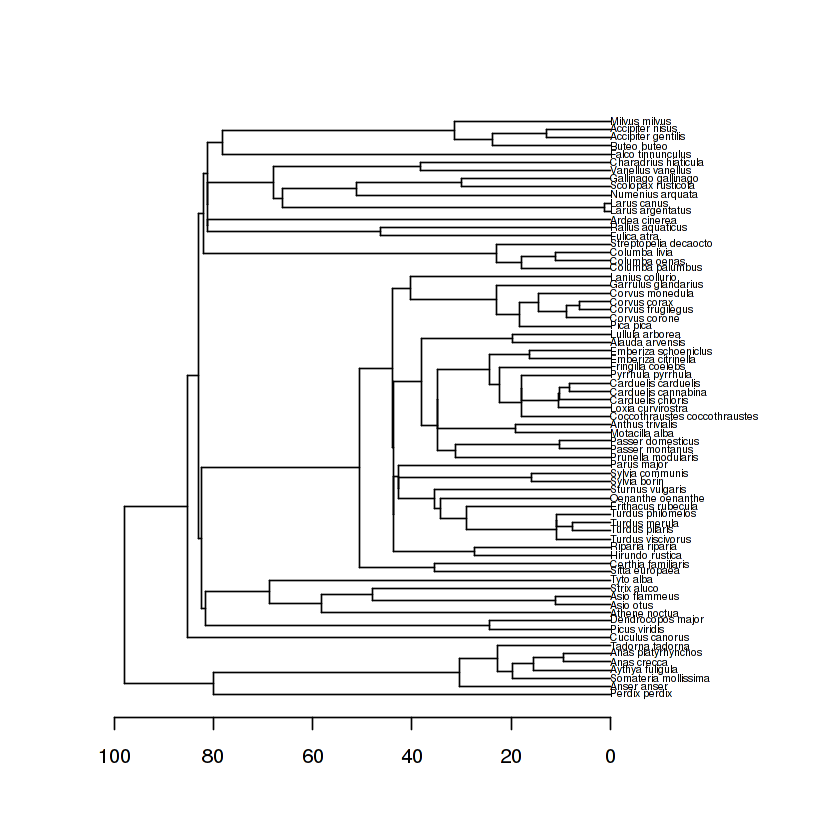

In [3]:
library(geiger)
#first we just need to name the rows in our data frame by genus
rownames(d) <- d$Species
#and then get rid of the genus column
d$Species <- NULL
d <- scale(d)
td <- treedata(tree, d, warnings=FALSE)
tree <- td$phy
d <- data.frame(td$data)
#show the first few rows
head(d)
#plot the tree
plot(tree, cex=0.5)
#add a time scale
axisPhylo()

OK. Now we've got everything in place. We're ready to test our Hypothesis that sick birds are more likely to get taken out by predators. 

But first let's get a better sense for this whole phylogenetic non-independence issue. A plot will help. Here's the bird phylogeny again, with bars on the right showing the body mass of each species.

Loading required package: maps


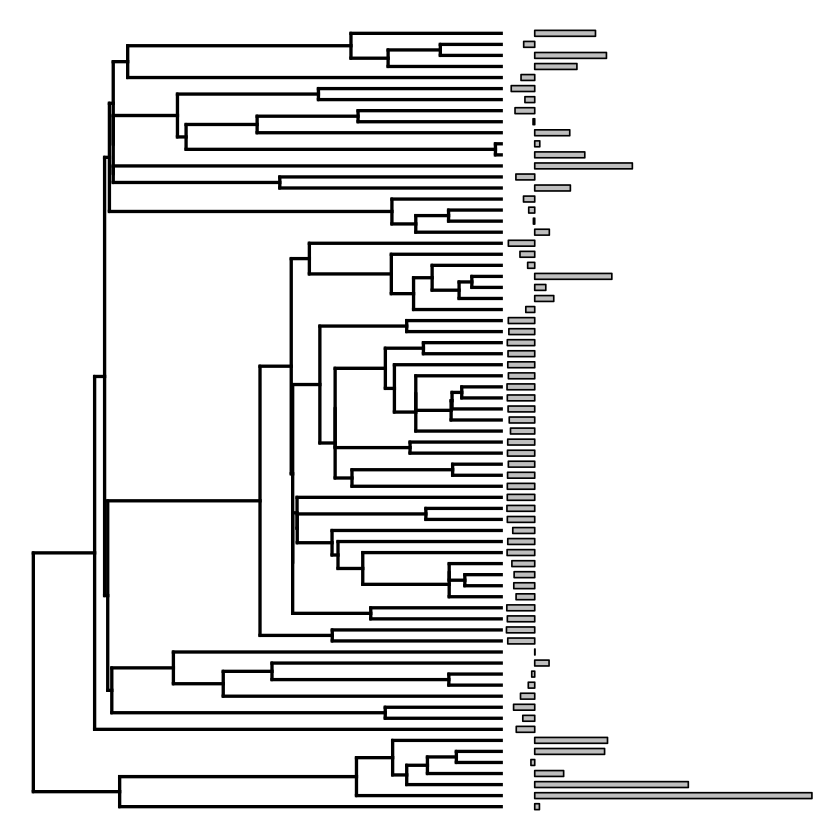

In [4]:
library(phytools)
bm <- d$Body_mass
names(bm) <- rownames(d)
plotTree.wBars(tree,bm,scale=10)

Notice how closely-related species tend to have similar sizes? For example the six-species clade at the bottom of the figure has several of the biggest species. And the there is a pack of small birds in the middle of the figure? That's called **phylogenetic conservatism**. Biologists might also say that bird body size has **phylogenetic signal**. What it means (at least in most cases) is that a trait evolves slowly; closely-related extant species tend to have trait values that resemble those of their common phylogenetic ancestors. 

We can quantify the level of phylogenetic signal, with a function from the R package phytools. In brief, it simulates a bunch of tip values with a model in which phylogeny doesn't matter. For each simulation it calculates a test statistic called K, which basically tells us how close the data are to what we'd expect under a Brownian Motion model. Then it compares the K estimated from the real data to the range of Ks estimated from the null data. That's the gist. And it's an example of how in general statisticians can use null hypotheses to generate null distributions for evaluating the significance of some test statistic. For our purposes, the only thing you need to know is that K is an index of phylogenetic signal. If you want to understand why, check out [this](http://blog.phytools.org/2012/03/phylogenetic-signal-with-k-and.html) from the developer of the phytools package.

In [5]:
phylosig(tree, bm, test=TRUE)

$K
[1] 0.6419864

$P
[1] 0.004

K is our stat, and P is for p-value. Does body mass have much phylogenetic signal?

Now let's calculate phylogenetically-independent contrasts for each of our features. Then we can just plug them into linear regression.

In [6]:
risk <- pic(d$Prey_vulnerability_index, tree)
size <- pic(d$Body_mass, tree)
pop.density <- pic(d$Population_density, tree)
sick <- pic(d$Prevalence_of_blood_parasites, tree)
m.pic <- lm(risk ~ sick + size + pop.density -1)
summary(m.pic)


Call:
lm(formula = risk ~ sick + size + pop.density - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38481 -0.10069  0.00247  0.08910  0.41087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
sick         0.38094    0.07810   4.878 6.93e-06 ***
size        -0.13542    0.09271  -1.461  0.14879    
pop.density -0.29665    0.09152  -3.241  0.00185 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.152 on 67 degrees of freedom
Multiple R-squared:  0.3779,	Adjusted R-squared:  0.3501 
F-statistic: 13.57 on 3 and 67 DF,  p-value: 5.149e-07


What does this tells us? Are sick birds more likely to blown up by predators.

Let's plot it. Our model above had three predictors. It's easier to look at the relationship between two. First we'll fit a simpler, univariate model, and then we'll draw that line on a two-dimensional scatter plot.

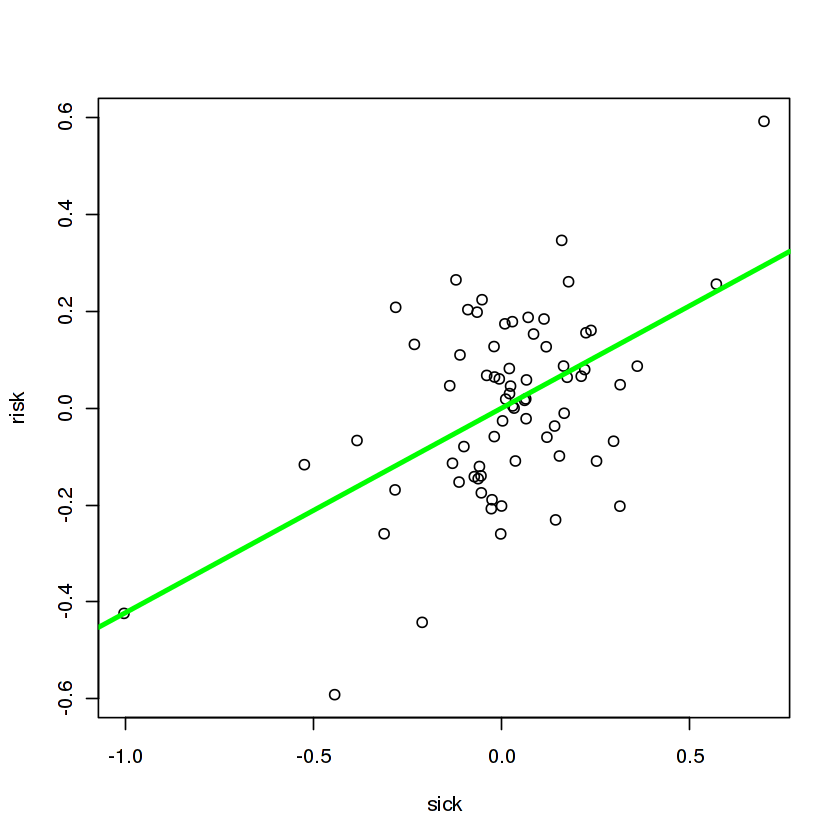

In [7]:
m.2d <- lm(risk ~ sick -1)
#note that in a PIC regression we do something called supressing the intercept. 
#We force the line to go through the origin (0,0). That because, we assume that when our model features
#are measured from the same population there should be no significant contrasts.
plot(risk ~ sick -1)
abline(m.2d, lwd=3, col='green')